In [ ]:
!pip install osmnx

In [5]:
import osmnx as ox
import networkx as nx
ox.config(log_console=True, use_cache=True)

In [14]:
def plot_graph_route(origin=(6.508813001668548,3.37740316890347),destination=(6.650969799999999,3.3450307),place = 'Lagos, Nigeria'):
  mode      = 'drive'       
  optimizer = 'length'        


  graph = ox.graph_from_place(place, network_type = mode)

  orig_node = ox.get_nearest_node(graph, origin)
  dest_node = ox.get_nearest_node(graph, destination)
  shortest_route = nx.shortest_path(graph, orig_node, dest_node, weight=optimizer)

  return shortest_route , graph

In [15]:
shortest_route, graph = plot_graph_route()

/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [16]:
shortest_route_map = ox.plot_route_folium(graph, shortest_route)
shortest_route_map

In [17]:
shortest_route_map = ox.plot_route_folium(graph, shortest_route, 
                                          tiles='openstreetmap')
shortest_route_map

In [18]:
# allow user to choose from variable display options
import folium
folium.TileLayer('openstreetmap').add_to(shortest_route_map)
folium.TileLayer('Stamen Terrain').add_to(shortest_route_map)
folium.TileLayer('Stamen Toner').add_to(shortest_route_map)
folium.TileLayer('Stamen Water Color').add_to(shortest_route_map)
folium.TileLayer('cartodbpositron').add_to(shortest_route_map)
folium.TileLayer('cartodbdark_matter').add_to(shortest_route_map)
folium.LayerControl().add_to(shortest_route_map)
shortest_route_map

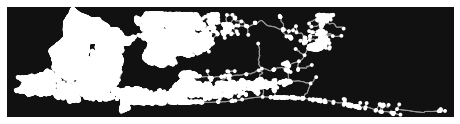

In [21]:
fig, ax = ox.plot_graph(graph)